# TIA - Taller 4: Segmentación 

#### Integrantes:
- Daniel Felipe Segura Rincon
- Andres Felipe Zuleta Romero
- Juan Andres Barrera Rodriguez

In [38]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print ("OpenCV Version : %s " % cv2.__version__)

from scipy import signal
from scipy import misc
from scipy.ndimage import label



OpenCV Version : 4.9.0 


In [26]:
bicicleta = cv2.imread('Imagenes/Bicicleta.jpg',0)
bus = cv2.imread('Imagenes/Bus.jpg')
carro = cv2.imread('Imagenes/Carro.jpg',0)
pare = cv2.imread("Imagenes/Pare.jpg",0)
planta = cv2.imread('Imagenes/Planta.jpg',0)

#### Umbralización

In [27]:
def umbral(img, img1):
    ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

    th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,
                cv2.THRESH_BINARY,11,2)


    ret,th3 = cv2.threshold(img1,127,255,cv2.THRESH_BINARY)

    th4 = cv2.adaptiveThreshold(img1,255,cv2.ADAPTIVE_THRESH_MEAN_C,
                cv2.THRESH_BINARY,11,2)


    #Visualizacion
    plt.figure(1,figsize=(10,5))
    plt.subplot(131),plt.imshow(img,cmap = 'gray')
    plt.title('Imagen'), plt.xticks([]), plt.yticks([])
    plt.subplot(132),plt.imshow(th1,cmap = 'gray')
    plt.title('Umbralizacion'), plt.xticks([]), plt.yticks([])
    plt.subplot(133),plt.imshow(th2,cmap = 'gray')
    plt.title('Umbral. Adaptativa'), plt.xticks([]), plt.yticks([])

    plt.figure(2,figsize=(10,5))
    plt.subplot(131),plt.imshow(img1,cmap = 'gray')
    plt.title('Imagen'), plt.xticks([]), plt.yticks([])
    plt.subplot(132),plt.imshow(th3,cmap = 'gray')
    plt.title('Umbralizacion'), plt.xticks([]), plt.yticks([])
    plt.subplot(133),plt.imshow(th4,cmap = 'gray')
    plt.title('Umbral. Adaptativa'), plt.xticks([]), plt.yticks([])

    plt.show()

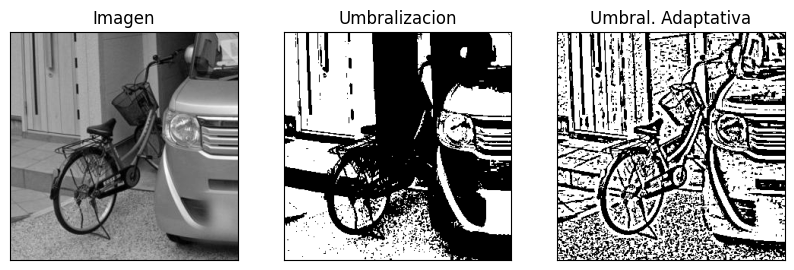

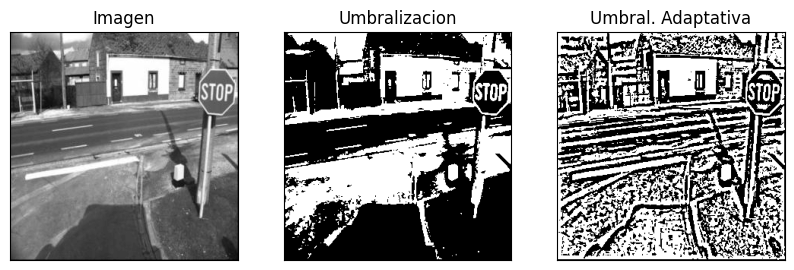

In [28]:
umbral(bicicleta,pare)

In [14]:
def div_mezcla(img, semilla, umbral):
    # Crear una máscara 
    mascara = np.zeros_like(img, dtype=np.uint8)
    h, w = img.shape[:2]

    # Obtener el color semilla
    semilla_color = img[semilla[1], semilla[0]]

    # Lista de píxeles a revisar
    lista_pixel = [semilla]

    vecinos = [(x, y) for x in range(-1, 2) for y in range(-1, 2) if x != 0 or y != 0]

    while len(lista_pixel) > 0:
        
        pixel_actual = lista_pixel[0]
        lista_pixel = lista_pixel[1:]

        
        if 0 <= pixel_actual[0] < w and 0 <= pixel_actual[1] < h:
            
            if mascara[pixel_actual[1], pixel_actual[0]] == 0:
                
                color_diff = np.sqrt(np.sum((img[pixel_actual[1], pixel_actual[0]] - semilla_color) ** 2))

                
                if color_diff < umbral:
                    mascara[pixel_actual[1], pixel_actual[0]] = 255

                    
                    for neighbor in vecinos:
                        new_pixel = (pixel_actual[0] + neighbor[0], pixel_actual[1] + neighbor[1])
                        if 0 <= new_pixel[0] < w and 0 <= new_pixel[1] < h:
                            lista_pixel.append(new_pixel)


    return mascara

In [15]:
def segm(img):

    # Aplicar la segmentación 
    semilla_point = (100, 100)  # Punto de la semilla
    umbral_value = 200      # Umbral de similitud

    segmented_region = div_mezcla(img, semilla_point, umbral_value)

    # Mostrar la imagen original y la región segmentada
    plt.figure(1)
    plt.subplots_adjust(top=1.75,bottom=0.3,left=0.10,right=2,hspace=0.25,wspace=0.5)
    plt.subplot(221),plt.imshow(img,cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.subplot(222),plt.imshow(segmented_region)
    plt.xticks([]), plt.yticks([])


C:\Users\Daniel Segura\AppData\Local\Temp\ipykernel_23164\884035085.py:24: RuntimeWarning: overflow encountered in scalar subtract
  color_diff = np.sqrt(np.sum((img[pixel_actual[1], pixel_actual[0]] - semilla_color) ** 2))


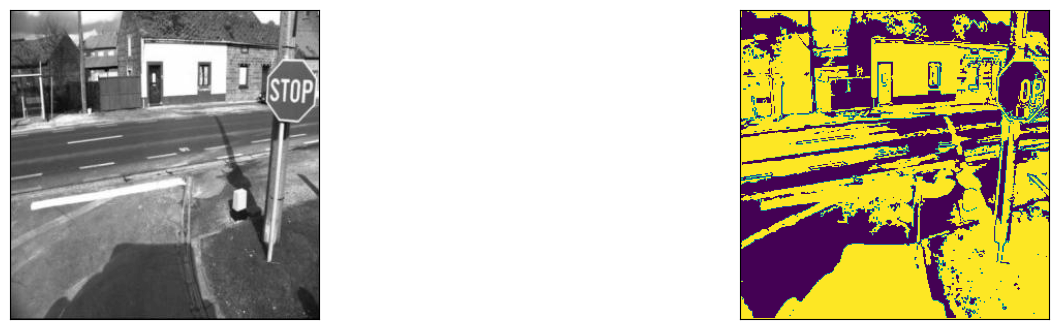

In [17]:
segm(bicicleta)

C:\Users\Daniel Segura\AppData\Local\Temp\ipykernel_23164\884035085.py:24: RuntimeWarning: overflow encountered in scalar subtract
  color_diff = np.sqrt(np.sum((img[pixel_actual[1], pixel_actual[0]] - semilla_color) ** 2))


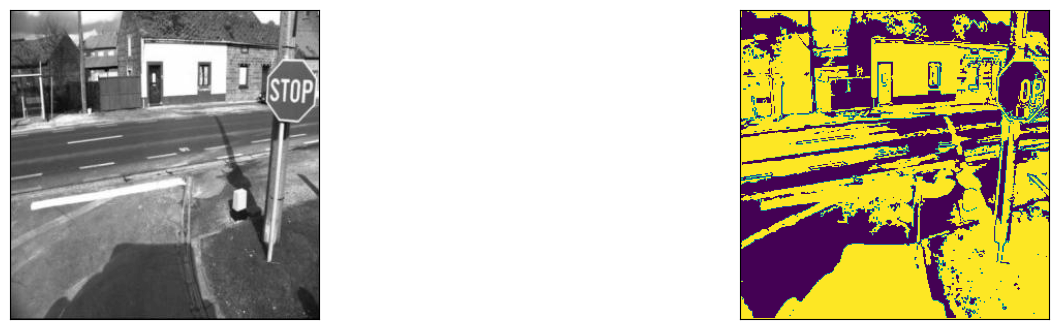

In [18]:
segm(pare)

C:\Users\Daniel Segura\AppData\Local\Temp\ipykernel_23164\884035085.py:24: RuntimeWarning: overflow encountered in scalar subtract
  color_diff = np.sqrt(np.sum((img[pixel_actual[1], pixel_actual[0]] - semilla_color) ** 2))


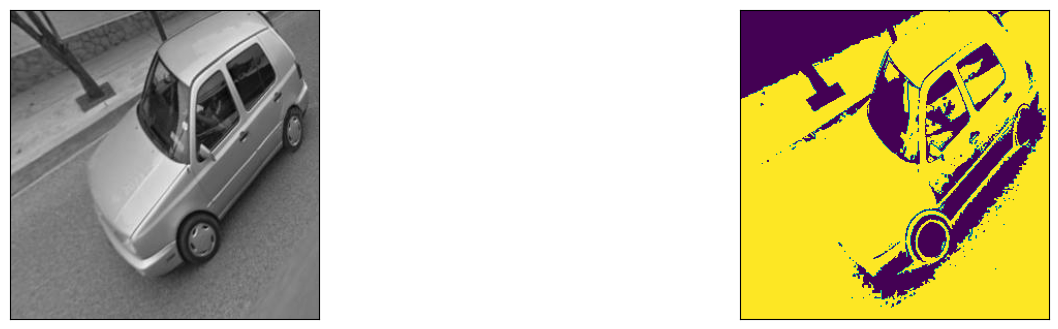

In [19]:
segm(carro)

#### Conclusiones
- El uso de métodos precisos de segmentación garantizan que las regiones relevantes de la imagen estén correctamente identificadas y resaltadas para su posterior análisis. 
- La capacidad de los métodos de segmentación para adaptarse a diversas condiciones ambientales garantiza un rendimiento consistente del sistema de reconocimiento de imágenes en la calle.
- La segmentación eficaz ayuda a reducir el ruido y las interferencias en las imágenes, lo que facilita la detección y el reconocimiento de objetos de interés en entornos urbanos concurridos y dinámicos. 
